In [6]:
import numpy as np
import cvxopt

In [10]:
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


### gd.py

In [30]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps ** 2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
            
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

### gd_test1.py

In [31]:
import matplotlib.pyplot as plt

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


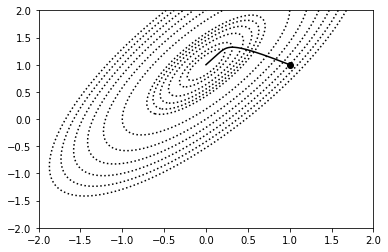

In [35]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([
        10 * x - 6 * y + 6,
        -6 * x + 6 * y - 6
    ])

algo = GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color='k', marker='o')
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color='k', linewidth=1.5)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)

xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors='k', linestyles='dotted')

### gd_test2.py

/Users/tanimu/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/Users/tanimu/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/tanimu/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/tanimu/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


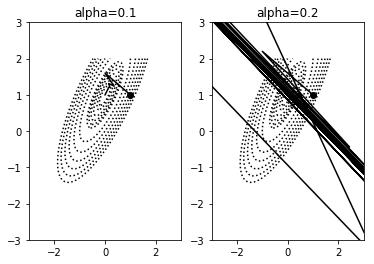

In [40]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)
    
xs = np.linspace(xmin, xmax, 300)
xs = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8,  -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title('alpha={}'.format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color='k', marker='o')
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color='k', linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors='k', linestyles='dotted')

### newton1dim.py

In [41]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x)/df(x)
        if abs(x - x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new

def f(x):
    return x**3 - 5 * x + 1

def df(x):
    return 3 * x**2 - 5

print(newton1dim(f, df, 2))
print(newton1dim(f, df, 0))
print(newton1dim(f, df, -3))

2.1284190638445777
0.20163967572340463
-2.330058739567982


In [42]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(np.linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x - x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


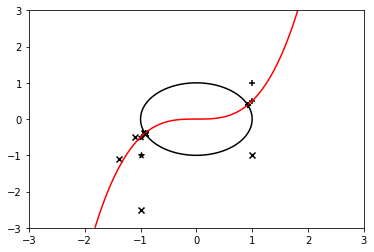

In [43]:
def f1(x, y):
    return x**3 - 2 * y

def f2(x, y):
    return x**2 + y**2 -1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3 * x**2 , -2],
                     [2 * x, 2 * y]])

xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.xlim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)

plt.contour(xmesh, ymesh, z1, colors='r', levels=[0])
plt.contour(xmesh, ymesh, z2, colors='k', levels=[0])
solver = Newton(f, df)
initials = [np.array([1, 1]),
            np.array([-1, -1]),
            np.array([1, -1])]

markers = ['+', '*', 'x']

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
               solver.path_[:, 1], color='k', marker=m)
    print(sol)